In [1]:
import math
import numpy as np
from matplotlib import pyplot as plt
min_angle = -0.513185441494
max_angle = 0.49990695715
angle_increment = 0.0015854307451

d_centre2cam = 0.09 #distance from centreof robot to front of camera
min_distance = 0.55 #robot cannot read less
clearence_width = 0.4 # space w need in order to go straight
phi = 0.35 #Forward distance for turning
C_mult = 1.1



#code

In [2]:
#@title
ints = round((max_angle-min_angle)/angle_increment)
print(ints)


turtlebot_r = 0.354 #radius of bot
hidden_dist = turtlebot_r/2 + d_centre2cam # distance taken up by bot footprint
front_blind = min_distance - (hidden_dist) # space in front we are blind to
print(front_blind)



half_width = clearence_width/2 #for trig

forward_boundary_angle = math.atan(half_width/(hidden_dist+phi))
forward_boundary_angle_deg = forward_boundary_angle*180/math.pi

print(forward_boundary_angle_deg)

#beta = forward_boundary_angle_deg


639
0.28300000000000003
17.96005562599744


SCAN_LENGTH (length of array): 
640
B Offset From Centre Index: 
198
Front Centre Distance Threshold
0.617
B Distance Threshold
0.65
C Distance Threshold
0.7788


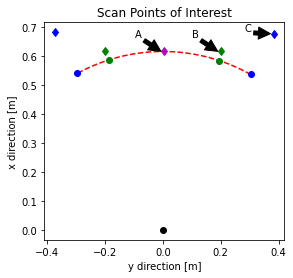

In [17]:
#@title
offset = math.pi/2

total_ints = ints +1
print("SCAN_LENGTH (length of array): ")
print(total_ints)
angles = np.linspace(offset + min_angle, offset + max_angle, num = (total_ints))

factor = hidden_dist + phi
sin_angles = np.sin(angles)
cos_angles = np.cos(angles)




B_offset = round(forward_boundary_angle/angle_increment)
print("B Offset From Centre Index: ")
print(B_offset)

A_index = round(total_ints/2) # +- 5
B_plus = A_index + B_offset # 5-
B_minus = A_index - B_offset #5+
C_minus = 0 #5+
C_plus = total_ints-1   #5-

print("Front Centre Distance Threshold")
print(factor)
B_dist = round(factor / sin_angles[B_minus], 3)
print("B Distance Threshold")

print(B_dist)


C_dist = round(factor / sin_angles[C_minus], 3) * C_mult
print("C Distance Threshold")
print(C_dist)

C_Factor = C_dist / factor


sin_angles *= factor
cos_angles *= factor
fig, axs = plt.subplots(1, 1)
plt.title("Scan Points of Interest") 
plt.xlabel("y direction [m]") 
plt.ylabel("x direction [m]") 
plt.plot(cos_angles,sin_angles, '--r')

plt.plot(cos_angles[C_minus],sin_angles[C_minus], 'ob')
plt.plot(cos_angles[B_minus],sin_angles[B_minus], 'og')
plt.plot(cos_angles[A_index],sin_angles[A_index], 'dm')
plt.plot(cos_angles[B_plus],sin_angles[B_plus], 'og')
plt.plot(cos_angles[C_plus],sin_angles[C_plus], 'ob')


# plt.plot(0,factor, 'ok')
plt.plot(-half_width, factor, 'dg')
plt.plot(half_width, factor, 'dg')
plt.plot(cos_angles[C_minus]*C_Factor,sin_angles[C_minus]* C_Factor, 'db')
plt.plot(cos_angles[C_plus]*C_Factor,sin_angles[C_plus]* C_Factor, 'db')


plt.plot(0,0, 'ok')
axs.set_aspect('equal', 'box')

axs.annotate('A', xy=(cos_angles[A_index]-0.01,sin_angles[A_index]), xytext=(cos_angles[A_index]-0.1,sin_angles[A_index]+0.05),
            arrowprops=dict(facecolor='black', shrink=0.01))
axs.annotate('B', xy=(half_width-0.01,factor), xytext=(half_width-0.1,factor+0.05),
            arrowprops=dict(facecolor='black', shrink=0.01))
axs.annotate('C', xy=(cos_angles[C_minus]*C_Factor-0.01,sin_angles[C_minus]*C_Factor), xytext=(cos_angles[C_minus]*C_Factor-0.1,sin_angles[C_minus]*C_Factor+0.01),
            arrowprops=dict(facecolor='black', shrink=0.01));